In [1]:
from GPModels.GPControlNoBound import *


-10.0 9.9609375
0.0 1.9921875


In [2]:
Models,Controls = runner()

192
[1000.    0.  500.    0.  250.    0.  750.    0.  375.    0.]


191
[ 4.51877146e+01 -7.30645910e+00  8.03462242e+01 -1.26610776e-02
  3.92331031e+00 -3.75579594e-01  9.92503492e+01  1.54677935e-01
 -1.00213648e+00  1.95428123e-01]


190
[12.47522038 -3.57358771 40.23976474 -0.0898772  -2.18651966 -1.33582864
 65.71311953 -0.06895173 -2.6372691  -1.64382798]


189
[-0.39449758 -2.74073336 46.39603946  0.78750721 -2.04324381  0.14315052
 50.00658262  3.07109282 -2.1102872  -1.37110559]


188
[-1.07244171 -2.36504735 37.68252908  0.42434518 -0.93265051  5.76670223
 37.79081298  5.10039561 -1.22404039  0.58122343]


187
[ 2.69160906e-03  2.45127680e+00  3.64566583e+01  4.77727916e-01
 -8.34657225e-01  2.42919315e+01  2.69936655e+01  9.94061482e+00
 -1.88419804e-01  1.98124398e+00]


186
[ 1.03791217  0.87570387 49.53639758  9.54098011 -1.10052875 13.53692433
 14.40481536 13.0581675   0.19003698  0.39237901]


185
[ 1.63597141  1.00193274 54.14235884  5.45593848 -1.17101373 13.24293223

Text(0.5, 1.0, 'B(t,demand = -2, I = 9)')

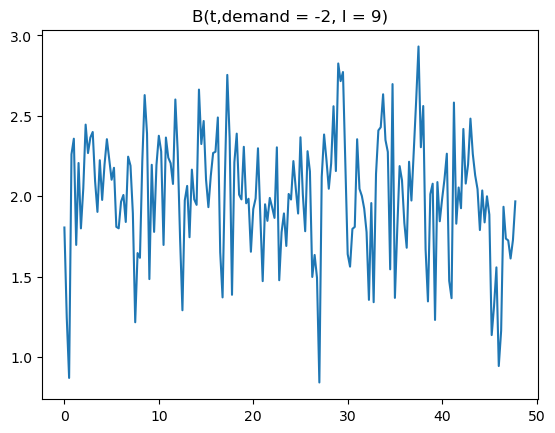

In [3]:
import matplotlib.pyplot as plt

t = np.linspace(0,47.75,nstep)
B_star = np.zeros(len(t))
for i in range(len(t)):
    inp = np.array([-2,9]).reshape(1,-1)
    B_star[i] = Controls[i].predict(inp)[0].flatten()[0]
plt.plot(t,B_star)
plt.title("B(t,demand = -2, I = 9)")

In [4]:
X_range = np.arange(-10,10+0.1,0.01)
I_range  = np.arange(0,10+0.1,0.01)
B_range_t0 = np.zeros((len(I_range),len(X_range)))
B_range_tmid = np.zeros((len(I_range),len(X_range)))
B_range_t47 = np.zeros((len(I_range),len(X_range)))
B_range_t46 = np.zeros((len(I_range),len(X_range)))
B_range_tend = np.zeros((len(I_range),len(X_range)))
for i in range(len(I_range)):
    inp = np.column_stack((X_range,I_range[i] * np.ones(len(X_range))))
    B_range_t0[i,:] = Controls[0].predict(inp)[0].flatten()
    B_range_tmid[i,:] = Controls[nstep//2].predict(inp)[0].flatten()
    B_range_t47[i,:]= Controls[-4].predict(inp)[0].flatten()
    B_range_tend[i,:] = Controls[-1].predict(inp)[0].flatten()

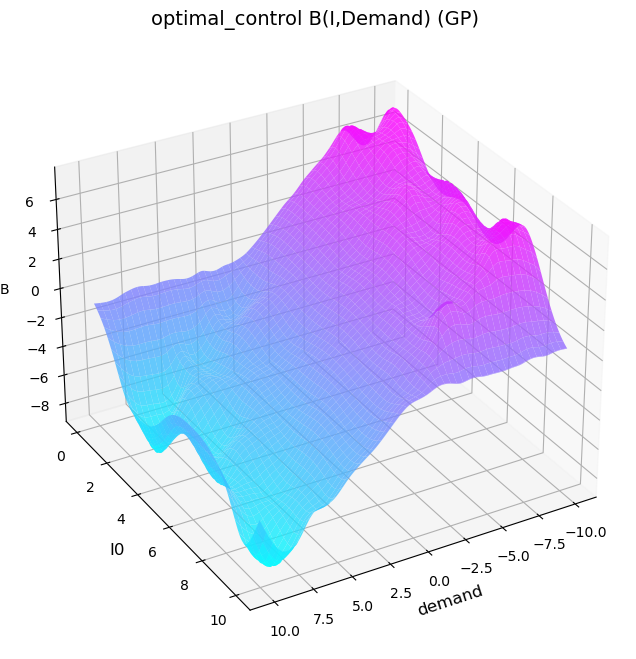

In [5]:
X, Y = np.meshgrid(X_range, I_range)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, B_range_t0, cmap='cool', alpha=0.8)
ax.set_title('optimal_control B(I,Demand) (GP) ', fontsize=14)
ax.set_xlabel('demand', fontsize=12)
ax.view_init(30, 60)
ax.set_ylabel('I0', fontsize=12)
ax.set_zlabel('B', fontsize=10)
plt.show()

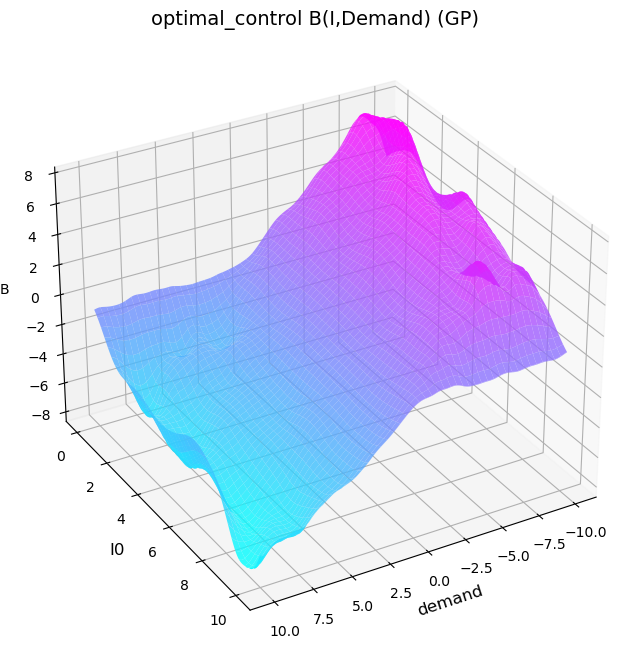

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, B_range_tmid, cmap='cool', alpha=0.8)
ax.set_title('optimal_control B(I,Demand) (GP) ', fontsize=14)
ax.set_xlabel('demand', fontsize=12)
ax.view_init(30, 60)
ax.set_ylabel('I0', fontsize=12)
ax.set_zlabel('B', fontsize=10)
plt.show()

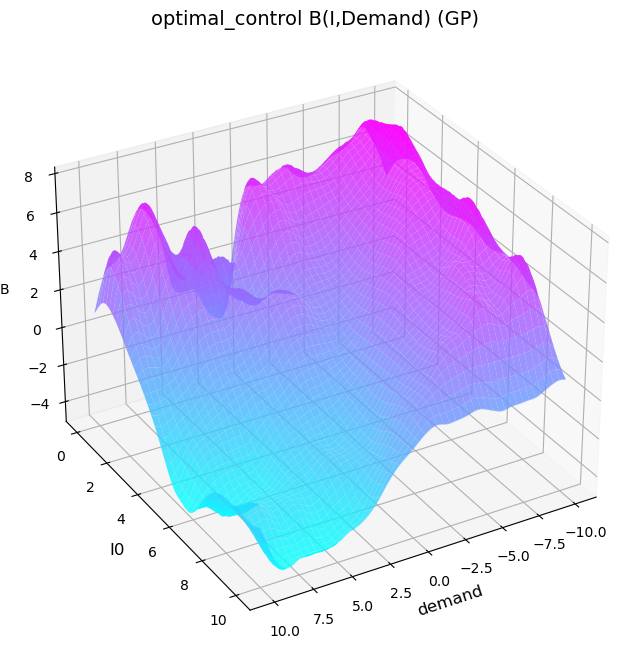

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, B_range_t47, cmap='cool', alpha=0.8)
ax.set_title('optimal_control B(I,Demand) (GP) ', fontsize=14)
ax.set_xlabel('demand', fontsize=12)
ax.view_init(30, 60)
ax.set_ylabel('I0', fontsize=12)
ax.set_zlabel('B', fontsize=10)
plt.show()

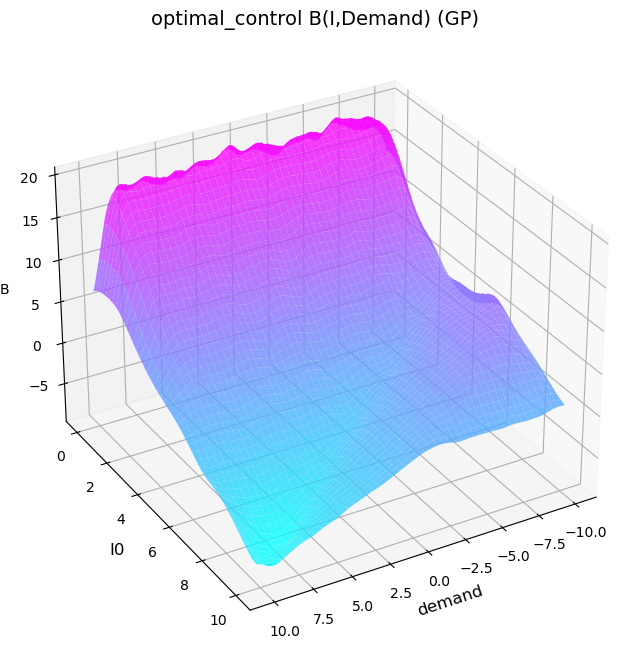

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, B_range_tend, cmap='cool', alpha=0.8)
ax.set_title('optimal_control B(I,Demand) (GP) ', fontsize=14)
ax.set_xlabel('demand', fontsize=12)
ax.view_init(30, 60)
ax.set_ylabel('I0', fontsize=12)
ax.set_zlabel('B', fontsize=10)
plt.show()

In [9]:
X_range = np.arange(-10,10+0.1,0.01)
I_range  = np.arange(0,10+0.1,0.01)
cond_V0 = np.zeros((len(I_range),len(X_range)))
cond_Vmid = np.zeros((len(I_range),len(X_range)))
cond_Vend = np.zeros((len(I_range),len(X_range)))
for i in range(len(I_range)):
    inp = np.column_stack((X_range,I_range[i] * np.ones(len(X_range))))
    cond_V0[i,:] = Models[0].predict(inp)[0].flatten()
    cond_Vmid[i,:] = Models[nstep//2].predict(inp)[0].flatten()
    cond_Vend[i,:] = Models[-1].predict(inp)[0].flatten()



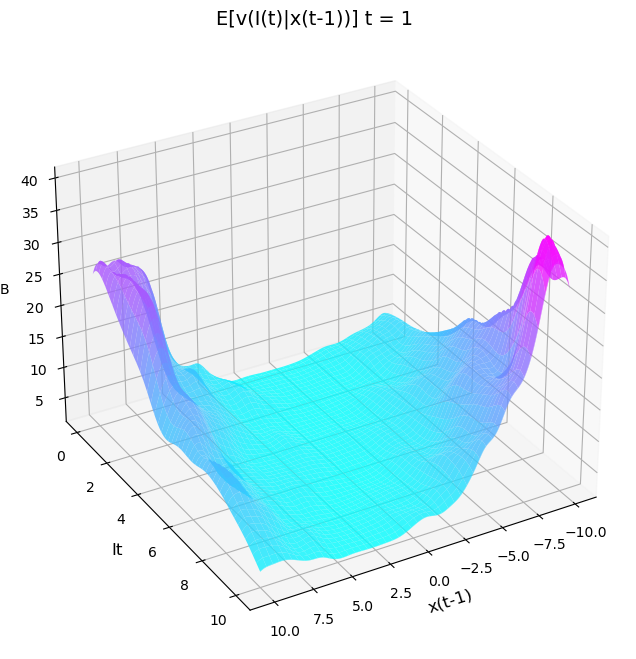

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, cond_V0, cmap='cool', alpha=0.8)
ax.set_title('E[v(I(t)|x(t-1))] t = 1 ', fontsize=14)
ax.set_xlabel('x(t-1)', fontsize=12)
ax.view_init(30, 60)
ax.set_ylabel('It', fontsize=12)
ax.set_zlabel('B', fontsize=10)
plt.show()

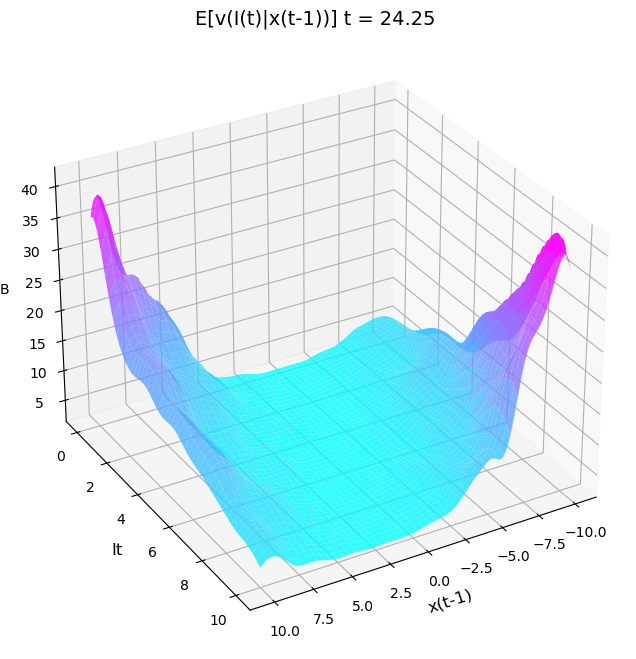

In [16]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, cond_Vmid, cmap='cool', alpha=0.8)
ax.set_title('E[v(I(t)|x(t-1))] t = 24.25 ', fontsize=14)
ax.set_xlabel('x(t-1)', fontsize=12)
ax.view_init(30, 60)
ax.set_ylabel('It', fontsize=12)
ax.set_zlabel('B', fontsize=10)
plt.show()

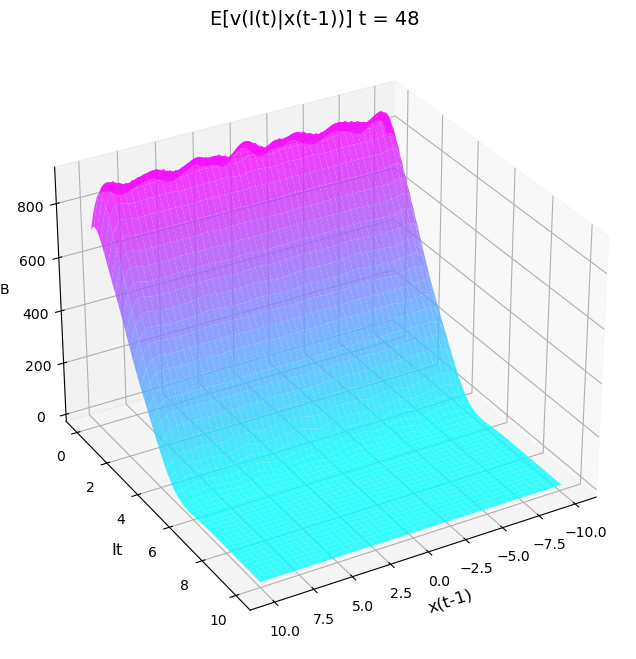

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, cond_Vend, cmap='cool', alpha=0.8)
ax.set_title('E[v(I(t)|x(t-1))] t = 48 ', fontsize=14)
ax.set_xlabel('x(t-1)', fontsize=12)
ax.view_init(30, 60)
ax.set_ylabel('It', fontsize=12)
ax.set_zlabel('B', fontsize=10)
plt.show()